# Homework 8: Dimensionality Reduction and PCA
by Karanraj Chauhan with help from B. Kulis, N. Frumkin and R. Manzelli, and A. Tsiligkardis, adapted for 2021 by Sadie Allen

## Problem 1: Eigenvectors and Eigenvalues

Compute the eigenvectors and eigenvalues for the following matrices **by hand**. Note: you do not need to simplify square roots, irrational fractions, etc., in case you have any in your answers.

a.
\begin{bmatrix}
  0 & 2 \\
  2 & -3     
\end{bmatrix}

b.
\begin{bmatrix}
  -6 & 3 \\
  4 & 5     
\end{bmatrix}

**SOLUTION:**<br>
**For problem 1 and 2, see bottom for attached PDF**

## Problem 2: PCA by Hand
PCA is a dimensionality reduction problem. We will work through a simple numerical example where we translate a 2-dimensional dataset to a 1-dimensional dataset by hand to get a feel for what is going on mathematically. In practice, this would be use for much larger dimensions, but for the sake of easy calculations and data visualization, we have kept the dimensions small. 

Suppose you have the following dataset:

$$X = \begin{bmatrix}
  -1 & -1 \\
  0 & -2 \\
  -2 & 2 \\
  3 & -1     
\end{bmatrix}$$

**a.** Center the dataset and plot it. Call this centered data matrix $\tilde{X}$.



**SOLUTION:**

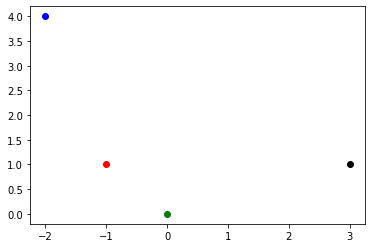

In [ ]:
from matplotlib import pyplot as plt
x1 = [-1, 0, -2, 3] # Column 1 of centered dataset 
x2 = [1, 0, 4, 1] # Column 2 of centered dataset
colors = ['r', 'g', 'b', 'k']


for i in range(4):
  plt.scatter(x1[i],x2[i], color=colors[i])

**b.** Compute the covariance matrix of the data.



**SOLUTION:**

**c.** Calculate the eigenvalues and eigenvectors of the covariance matrix. (Approximate values are fine). Make sure your eigenvectors are unit length. Plot the eigenvectors on the dataset (you may have to scale them up slightly).  

**SOLUTION:**

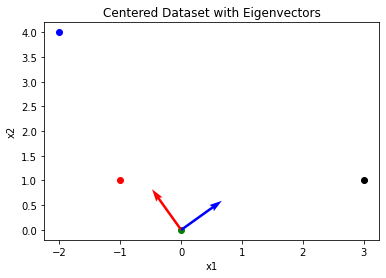

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

x1 = [-1, 0, -2, 3]# Column 1 of centered dataset
x2 = [1, 0, 4, 1]# Column 2 of centered dataset
colors = ['r', 'g', 'b', 'k']

V = 3 * np.array([ [-0.58, 0.81], [0.81, 0.58] ])# array of eigenvectors
origin = np.array([[0,0],[0,0]])

plt.title("Centered Dataset with Eigenvectors")
plt.xlabel("x1")
plt.ylabel("x2")
for i in range(4):
  plt.scatter(x1[i],x2[i], color=colors[i])
plt.quiver(*origin, V[:,0], V[:,1], color=['r', 'b'], scale=20)

**d.** Pick the k=1 largest eigenvalues and form a matrix of eigenvectors, C.


**SOLUTION:**


**e.** Transform the standardized data matrix with your matrix of eigenvectors and plot it. Call the transformed data matrix $Y$. 

**SOLUTION:**

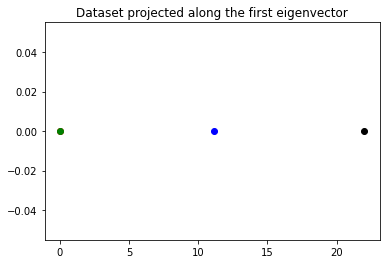

In [ ]:
import math
from matplotlib import pyplot as plt
Y = [0, 0, 11.16, 22,32] # your transformed dataset 
dim = [0, 0, 0, 0]
colors = ['r', 'g', 'b', 'k']

plt.title("Dataset projected along the first eigenvector")
for i in range(4):
  plt.scatter(Y[i],dim[i], color=colors[i])

## Problem 3: Eigenfaces

[Eigenfaces](https://en.wikipedia.org/wiki/Eigenface) is the name given to a set of eigenvectors (principal components) when they are used in the computer vision problem of human face recognition. These eigenvectors/principal components can be derived from the covariance matrix of $X$, where $X$ is a $d$ x $n$ matrix such that each column of $X$ represents an image. (Recall: in lecture, we discussed that one of the ways of interpreting PCA is projecting data onto the $k$ leading eigenvectors of the sample covariance matrix)

**a. Load Image Data(sub)set** Load the numpy array `lfw_funneled_subset.npy` using the [load](https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html) function from numpy. This numpy array represents a subset of the [LFW Face Database](http://vis-www.cs.umass.edu/lfw/)\[1\]. It is of shape 75 x 250 x 250, representing 75 images of faces of celebrities. Using this, calculate the mean face, i.e. the average of the 75 images. Display this mean face image using the [imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) function from matplotlib.

In [ ]:
import pdb
import os
import numpy as np
from PIL import Image
from glob import glob
from matplotlib import pyplot as plt

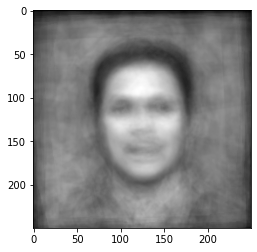

In [ ]:
# read in the dataset
images = np.load('lfw_funneled_subset.npy')

# height and width of each image
img_height, img_width = images[0, ...].shape

# calculate mean image and display
mean_im = np.mean(images,axis=0) # YOUR CODE HERE 
plt.imshow(mean_im, cmap="gray")
plt.show()

**b. Reshaping** Reshape the matrix to shape 62500 x 75 so that each column is a "flattened" representation of an image. This is your $X$ matrix as described above.

In [ ]:
# reshape so that each image is a column vector
# images = np.reshape(images,(62500,75))# YOUR CODE HERE!
images = images.reshape(images.shape[0], -1).transpose()


**c. Eigenface Calculation** One way of finding principal components/eigenfaces is by finding top eigenvectors of the sample covariance matrix of $X$. However, this is often computationally infeasible because of the large size of the covariance matrix. Therefore, the following [math trick](https://en.wikipedia.org/wiki/Eigenface#Computing_the_eigenvectors) is used to compute the eigenvectors and eigenvalues : the eigenvectors and eigenvalues of $X \cdot X^T$ can be obtained by finding eigenvectors and eigenvalues of $X^T \cdot X$ first, and then pre-multiply these eigenvectors by $X$. This is more "doable" since $X^T \cdot X$ has dimensions 75 x 75 whereas $X \cdot X^T$ had dimensions 62500 x 62500. Using this trick, calculate the top 60 eigenfaces for the given data.

In [ ]:
def solve_eigenfaces(A, num_vecs, eigenvalue_thresh=0.00001):
    # number of images in dataset
    num_samples = A.shape[1] # CODE HERE
    
    # mean vector
    psi = np.mean(A,axis=1,keepdims=1) # CODE HERE 
    # mean center the dataset
    A = A - psi # CODE HERE
    
    # calculate patternwise covariance matrix
    L = A.T @ A # CODE HERE 
    
    # get eigenvalues and eigenvectors for L
    eigenvalues, eigenvectors = np.linalg.eig(L) # CODE HERE! Hint: np.linalg.eig
    
    # sort eigenvectors according to corresponding eigenvalues (in decreasing order)
    decr_sorted_eval_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[decr_sorted_eval_idx]
    eigenvectors = eigenvectors[:, decr_sorted_eval_idx]
    
    # convert the eigenvectors of A' * A into eigenvectors of A * A'
    eigenvectors = A @ eigenvectors # CODE HERE

    # normalize eigenvalues they are specifically for cov(A), not A * A'
    eigenvalues /= num_samples # CODE HERE
    
    # normalize vectors to unit length
    eigenvectors /= np.linalg.norm(eigenvectors, axis=0, keepdims= 1) # CODE HERE 
    # print(eigenvectors)

    # kill eigenvectors corresponding to tiny eigenvalues
    small_eigenvals_idx = eigenvalues < eigenvalue_thresh
    eigenvalues[small_eigenvals_idx] = 0
    eigenvectors[:, small_eigenvals_idx] = 0
    
    # warn if too many  eigenvectors killed
    num_good = len(small_eigenvals_idx) - sum(small_eigenvals_idx)
    if num_vecs > num_good:
        print('WARNING: {} principal components required but only {} are good'.format(num_vecs, num_good))
    
    # return top num_vecs eigenvalues and eigenvectors, as well as the mean vector
    return eigenvalues[:num_vecs], eigenvectors[:, :num_vecs], psi


In [ ]:
# get top num_components principal components
num_components = 60
evals, evecs, mean_vec = solve_eigenfaces(images, num_components)

**d. Eigenvalue Visualization** Plot the 60 eigenvalues computed corresponding to the 60 eigenfaces. (eigenvalue # on x-axis, eigenvalue on y-axis)

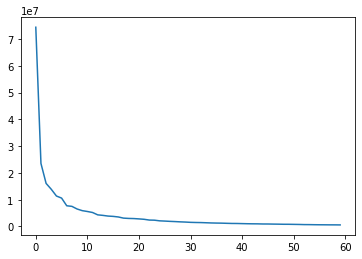

In [ ]:
# plot eigenvalues
# CODE HERE
plt.plot(evals)

**e. Projection and Reconstruction** An image $A$ can be represented in the space spanned by the top $k$ eigenvectors/principal components as follows:
$$P = C^T \cdot (A - \mu) \\ \text{where } P \text{ is } k \text{ x } 1 \text{ projection}
\\ \mu \text{ is } d \text{ x } 1 \text{ mean image vector}
\\ C \text{ is } d \text{ x } k \text{ matrix of k eigenvectors}$$

The projection $P$ can be used to reconstruct $A$ using the top $k$ eigenvectors/principal components follows:
$$R = C \cdot P + \mu \\ \text{where } R \text{ is } d \text{ x } 1 \text{ reconstruction}
\\ P \text{ is } k \text{ x } 1 \text{ projection}
\\ \mu \text{ is } d \text{ x } 1 \text{ mean image vector}
\\ C \text{ is } d \text{ x } k \text{ matrix of k eigenvectors}$$

Randomly select three images from the $X$ matrix. For each image, calculate its representation/projection in the space spanned by
1. top 10 eigenfaces
2. top 20 eigenfaces
3. top 30 eigenfaces
4. top 40 eigenfaces
5. top 50 eigenfaces
6. top 60 eigenfaces

In total, you should have computed 18 projections, 6 for each image.

Finally, from each projection, reconstruct the original image. Display the original images and the reconstructed images (you do not need to display the projections) using the [imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) function from matplotlib.

In total, you should have computed 18 reconstructions, 1 from each projection.

[ 0 38 25]


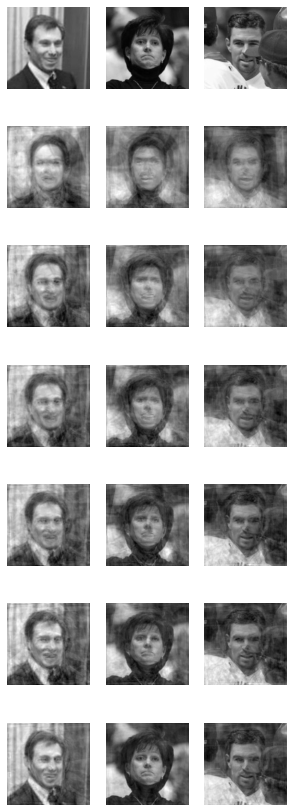

In [ ]:
# number of images to project and reconstruct (i.e. "test")
num_imgs = 3

# indices in dataset of the images to test
imgs_idx = np.random.choice(75, num_imgs) # GET RANDOM INDICES
print(imgs_idx)

# figure for plotting the 1 original + 6 reconstructions for num_imgs images
fig, ax = plt.subplots(7, num_imgs, figsize=(5, 15))

for ii, idx in enumerate(imgs_idx):
    # get original image and its reconstruction using 10, 20, 30, 40, 50, 60 eigenfaces
    im = images[:, idx]
    im = im.reshape(-1, 1)

    # add original image to figure
    ax[0][ii].imshow(im.reshape(img_height, img_width), cmap="gray")
    ax[0][ii].axis('off')
    
    # project and reconstruct, adding the reconstructed image to axes for plotting
    for ci, num_comps in enumerate(range(10, 61, 10)):
        projection = evecs[:,0:num_comps].T @ (im - mean_vec) # CALCULATE PROJECTION 
        reconstruction = evecs[:,0:num_comps] @ projection + mean_vec # CALCULATE RECONSTRUCTION 
        reconstruction = reconstruction.reshape(250,250) # RESHAPE RECONSTRUCTION

        ax[ci+1][ii].imshow(reconstruction, cmap="gray")
        ax[ci+1][ii].axis('off')

plt.show()

## Problem 4: Predicting Parkinson's

In this problem, we will be applying PCA to the [Parkinson's Disease Classification dataset](http://archive.ics.uci.edu/ml/datasets/Parkinson%27s+Disease+Classification)\[2\] and then performing classification using the k nearest neighbors algorithm. For this problem, please use functions from the scikit-learn library ([PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), [KNearestNeighbors](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), etc) 

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

**a. Prepare and Pre-process** Load the data `pd_speech_X.csv` and corresponding labels `pd_speech_Y.csv`. Normalize the data by subtracting mean and dividing by variance for each attribute/feature. Split the data and labels into training and testing sets using train/test ratio of 0.8/0.2. Set the random state to be 10. 

In [ ]:
# load data
X = pd.read_csv('pd_speech_X.csv')
Y = pd.read_csv('pd_speech_Y.csv')
X.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,GNE_SNR_SEO,...,tqwt_skewnessValue_dec_33,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,0.00129,0.00200,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995,69.997496,76.088046,72.465512,539.342735,1031.849040,2447.162183,3655.054806,101.092218,83.147440,255.214830,396.643631,0.77778,11.7245,2.8277,1.17300,0.26512,0.083127,1200445.612,...,-0.173620,0.071728,0.010352,-2.73030,66.5007,36.9934,26.3508,51.9577,21.5451,8.2488,8.0024,6.9635,6.9189,5.0622,4.6068,7.7218,2.7224,2.4171,2.9383,4.2077,3.1541,2.8531,2.7496,2.1550,2.9457,2.1993,1.9830,1.8314,2.0062,1.6058,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,0.00112,0.00157,0.05516,0.502,0.02320,0.03675,0.06195,0.06961,0.984322,0.017974,21.497,67.415903,73.046374,71.528945,564.363614,1016.367294,2383.565201,3498.681572,58.465428,86.487292,248.357127,218.229722,0.81250,13.8284,2.8908,1.02210,0.22004,0.127410,1298455.445,...,0.684220,0.729330,0.780410,5.22940,8643.9860,3962.0554,2976.2411,4329.0607,4005.1329,1127.6762,116.5331,20.2332,13.6395,12.5514,13.6965,60.8974,6.2958,3.0323,3.4039,4.3794,2.4329,2.0585,2.1839,2.2061,3.0999,1.9824,1.6227,1.5783,2.0470,1.5772,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,0.00111,0.00171,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651,62.661706,71.633549,68.086583,548.444604,1032.406341,2357.826954,3678.128717,160.387771,54.685168,151.694847,84.240339,0.81818,26.9273,2.6975,0.84951,0.15756,0.116890,1272869.841,...,-0.060885,0.269510,-0.005522,0.35054,29.2717,32.4971,38.9453,85.1480,62.5132,9.7308,6.8890,6.1357,5.4926,3.9078,4.0864,6.9828,3.4411,3.5173,3.7204,4.2212,3.4881,3.4851,3.3007,2.0427,3.1436,2.1203,1.6627,1.6731,3.2597,1.5921,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,0.00268,0.00446,0.05451,0.527,0.02395,0.02857,0.04462,0.07185,0.968343,0.042003,19.865,76.306989,81.000749,79.190593,819.529588,1201.813897,3154.035654,4122.163933,238.667052,191.984916,573.752909,526.147599,0.98548,139.5744,1.6961,0.83405,0.17295,0.147370,1932289.206,...,-0.367170,0.366920,-0.492650,0.19164,591.0116,65.3827,53.9852,45.4458,34.6650,88.3259,46.6869,23.2911,19.2022,42.3957,100.3649,7.1967,6.3892,6.5496,6.0264,4.7656,4.8909,4.2531,3.0295,2.0362,1.8478,2.5776,2.2064,1

In [ ]:
# preprocess
X = pd.read_csv('pd_speech_X.csv')
Y = pd.read_csv('pd_speech_Y.csv')

# NORMALIZE X 
Xmean = X.mean(axis=0)
Xvar = X.var(axis=0)
X = X - Xmean
X = X / Xvar

In [ ]:
# split into train and test set. seed rng for consistency
# YOUR CODE HERE 
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.2, random_state=10)

**b.** Using the train data and labels, train a k nearest neighbors model with k=3. Report the correct classification rate.

In [ ]:
# apply knn
knn3_full = KNeighborsClassifier(n_neighbors=3) # YOUR CODE 
knn3_full.fit(X_train, y_train['class'])

# test the model 
y_test_preds_full = knn3_full.predict(X_test) # YOUR CODE 
CCR = (y_test['class'] == y_test_preds_full).mean()
 # YOUR CODE HERE 
print('Test CCR = {}'.format(CCR))

Test CCR = 0.7697368421052632


**b.** Apply PCA (use number of components = 7) to the train data. Next, transform the train data to its representation in the lower dimensional space learned by the PCA model. Using this representation, train a k nearest neighbors classifier with k=3. Report the correct classification rate on the test data.

In [ ]:
# pca using 5 components
pca = PCA(n_components=7) # YOUR CODE 
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# apply knn on transformed data
knn3 = KNeighborsClassifier(n_neighbors=3) # YOUR CODE 
knn3.fit(pca.transform(X_train), y_train['class'])

# test the model
y_test_preds = knn3.predict(pca.transform(X_test)) # YOUR CODE 
# conf_mat = confusion_matrix(y_test, y_test_preds)    # confusion matrix
CCR = (y_test['class'] == y_test_preds).mean() # YOUR CODE 
print('Test CCR =', CCR)

Test CCR = 0.7828947368421053


## Citations
1. Gary B. Huang, Vidit Jain, and Erik Learned-Miller. Unsupervised joint alignment of complex images. International Conference on Computer Vision (ICCV), 2007.
2. Sakar, C.O., Serbes, G., Gunduz, A., Tunc, H.C., Nizam, H., Sakar, B.E., Tutuncu, M., Aydin, T., Isenkul, M.E. and Apaydin, H., 2018. A comparative analysis of speech signal processing algorithms for Parkinsonâ€™s disease classification and the use of the tunable Q-factor wavelet transform. Applied Soft Computing, DOI